In [2]:
#required imports
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#download all files and save them in Dataframes
df_netflix = pd.read_csv("https://raw.githubusercontent.com/David2134657/Netflix_Imdb_rating/main/netflix.csv").drop_duplicates()
df_cont = pd.read_csv("https://raw.githubusercontent.com/David2134657/Netflix_Imdb_rating/main/continents.csv")
df_imbdmov = pd.read_excel("https://github.com/David2134657/Netflix_Imdb_rating/blob/main/imdb_movies.xlsx?raw=true")
df_imbdvotes = pd.read_excel("https://github.com/David2134657/Netflix_Imdb_rating/blob/main/imdb_votes.xlsx?raw=true")

# Task 1
- Pull in Netflix.csv file.
- Perform EDA
- provide summary statistics
- provide 3 visualizations to show distribution of numerical and categorical variables of your choice

In [6]:
#get a feeling for the data
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#seeing how many missing values thre are
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#get a overview
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


In [10]:
#file to dataframes
#df_netflix = pd.read_csv("https://raw.githubusercontent.com/David2134657/Netflix_Imdb_rating/main/netflix.csv").drop_duplicates()

#clean the data (EDA)
df_netflix = df_netflix[df_netflix['country'].notna()] #drop all entries without country
df_netflix.release_year=df_netflix.release_year.astype(np.int64) #change column type of release year
df_netflix['title']=df_netflix['title'].str.lower() #change to lower case
df_netflix['director']=df_netflix['director'].str.lower() #change to lower case


<AxesSubplot:xlabel='release_year', ylabel='Count'>

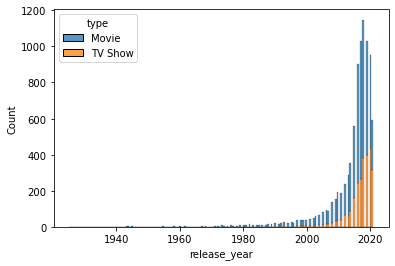

In [9]:
#visualizations
sns.histplot(data=df_netflix,x="release_year",hue="type",multiple="stack")


# Task 2
- Filter for and find the total number of movies in the Netflix dataset.

In [5]:
#create subframe with just the movies
df_netflix_movies = df_netflix[df_netflix.type == "Movie"]

len(df_netflix_movies)

5561

# Task 3
- Add a continent column to the dataset

In [6]:
#load in dataset containing countries with their continents
#df_cont = pd.read_csv("https://raw.githubusercontent.com/David2134657/Netflix_Imdb_rating/main/continents.csv")
dic_cont = {} #empty dictionary
for i, j in df_cont.iterrows(): 
    dic_cont[j["Country"]] = j["Continent"] #convert csv to dictionary

list_list = []
tmp_str = ""
for i, j in df_netflix_movies.iterrows():
    ls_cont = []
    tmp_ls = j["country"].split(", ")

    #loop through list of countries, select continent
    for cntry in tmp_ls:
        cnt = cntry.replace(",","")
        if cnt in dic_cont: #making sure country is in dictionary
            if not dic_cont[cnt] in ls_cont: #making sure not to have a continent twice
                ls_cont.append(dic_cont[cnt])

    str_ss = ','.join(ls_cont)
    list_list.append(str_ss)

#add list of continents to new column
df_netflix_movies["Continents"] = list_list

df_netflix_movies.head()

C:\Users\johan\AppData\Local\Temp\ipykernel_17356\3286588011.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movies["Continents"] = list_list


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Continents
0,s1,Movie,dick johnson is dead,kirsten johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",North America
7,s8,Movie,sankofa,haile gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","North America,Africa,Europe"
9,s10,Movie,the starling,theodore melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,North America
12,s13,Movie,je suis karl,christian schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Europe
24,s25,Movie,jeans,s. shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,Asia


# Task 4
- Pull in IMDB_movies and IMDB_votes files and join them.
- Check for and handle duplicate values in IMDB_movies dataset.
- Describe why you chose to handle the duplicates in such a way. What would be the alternative(s)?


In [7]:
#get data from csv files
#df_imbdmov = pd.read_excel("https://github.com/David2134657/Netflix_Imdb_rating/blob/main/imdb_movies.xlsx?raw=true").drop_duplicates()
#df_imbdvotes = pd.read_excel("https://github.com/David2134657/Netflix_Imdb_rating/blob/main/imdb_votes.xlsx?raw=true").drop_duplicates()

#merge dataframes
df_imbd = pd.merge(df_imbdmov, df_imbdvotes,  how='left', left_on='imdb_title_id', right_on = 'imdb_title_id')

df_imbd.head()

,imdb_title_id,title,director,avg_vote
0,tt0000009,Miss Jerry,Alexander Black,5.9
1,tt0000574,The Story of the Kelly Gang,Charles Tait,6.1
2,tt0001892,Den sorte drøm,Urban Gad,5.8
3,tt0002101,Cleopatra,Charles L. Gaskill,5.2
4,tt0002130,L'Inferno,"""Francesco Bertolini, Adolfo Padovan""",7.0


# Task 5
- Join IMDB datasets with the Netflix.csv file on title and director columns.
- Before joining the datasets, clean the title and director columns. 
- What cleaning operations did you perform and why?

In [8]:
# Netflix Data is already cleaned above
df_imbd['title']=df_imbd['title'].str.lower() #change to lower case
df_imbd['director']=df_imbd['director'].str.lower() #change to lower case

netflix_imbd = pd.merge(df_netflix_movies, df_imbd,  how='left', left_on=['title','director'], right_on = ['title','director'])

netflix_imbd


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Continents,imdb_title_id,avg_vote
0,s1,Movie,dick johnson is dead,kirsten johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",North America,NaN,NaN
1,s8,Movie,sankofa,haile gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","North America,Africa,Europe",tt0108041,6.9
2,s10,Movie,the starling,theodore melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,North America,NaN,NaN
3,s13,Movie,je suis karl,christian schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Europe,NaN,NaN
4,s25,Movie,jeans,s. shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,Asia,tt0151121,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,s8802,Movie,zinzana,majid al ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Asia,tt4377952,6.7
5559,s8803,Movie,zodiac,david fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",North America,tt0443706,7.7
5560,s8805,Movie,zombieland,ruben fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,North America,NaN,NaN
5561,s8806,Movie,zoom,peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",North America,tt0383060,4.4


# Task 6
- Find all movies that appear both in the Netflix and IMDB movies datasets.

In [9]:
df_movie_withrating = netflix_imbd.dropna(subset=["avg_vote"])

# Task 7
- Filter on movies that were categorized as comedies. Find the top 10 comedies on Netflix.

    a\. What year(s) were they released in?
    
    b\. What continent do these movies come from?

In [10]:
top_10_comedies = df_movie_withrating[df_movie_withrating['listed_in'].str.contains("Comedies")].sort_values(by =["avg_vote"],ascending=False).head(10)

print(top_10_comedies["release_year"].unique())
print(top_10_comedies["Continents"].unique())

[1979 2009 2017 2019 1975 2018 2014 1994 2001]
['Asia']
